# Using Foubase

The Fou database stores data on all fabricated wafers from our group. This means it includes stored in a number of tables data on all masksets, wafers, devices, measurements and furthermore evaluations of these measurements. To access this data, the foubase package maps the tables in the SQL database to Python classes.
## Access
The first step is always establishing a connection to the database:

In [6]:
from foubase import connection
connex = connection.Mysql_Connection("fouwaste", "pytestuser")
connex.connect("foubase")

ModuleNotFoundError: No module named 'mysql'

## Devices and Measurements
The main classes to interact with.

In [98]:
from foubase import devices, measurements
meas1 = measurements.read_measurement_sql_al([61213],connex)[0]
print(meas1)
print(meas1.meas_attrs)

measurement #61213 of type vi on device #352316 of type HHI_DFB on wafer PICA2_new#32
{'IDMeasurement': 61213, 'WaferName': 'PICA2_new#32', 'MeasurementType': 'vi', 'Operator': 'heibach', 'Comments': 'WV DC Measurement', 'Station': 'PIC_Lab1', 'Date': datetime.datetime(2022, 5, 11, 18, 35, 29), 'Parameters': None, 'PulseCW': '0', 'Temp': 35.0, 'CalibrationWL': -1.0, 'Pulseperiod': 1.0, 'Pulsewidth': 1.0}


In [99]:
dev1 = meas1.device
print(dev1)

{'IDDevice': 352316, 'IDMaskset': 241, 'IDChip': 6095, 'IDDeviceType': 3, 'IDAttributeList': 999, 'Bar': 'Bars_WV', 'ChipName': 'WV_opto_cell_L', 'DeviceNumber': 2.0, 'ChipNumber': 1, 'DeviceType': 'HHI_DFB', 'DeviceName': 'HHI_DFB__1_5_JEPX14_21_L', 'MasksetName': 'PICA2_new', 'xPos': 5673.12, 'yPos': 17307.806, 'Length': 500.0, 'Width': 224.0, 'angle': 0.0, 'L_S': -1.0, 'WL_L': 1.56e-06, 'L_G': -1.0, 'WL_G': -1.0, 'L_E': -1.0, 'L_C': -1.0, 'L_P': -1.0, 'L_FR': -1.0, 'L_IF': -1.0, 'L_IM': -1.0, 'L_RR': -1.0, 'L_PS': -1.0, 'L_SOA': -1.0, 'L_IR': -1.0, 'L_I': -1.0, 'WL_RR': -1.0, 'WL_FR': -1.0, 'R': -1.0, 'theta': -1.0}


Each measurement belongs to exactly one device, but a device can contain multiple measurements of different types and of all wafers of the device maskset.

In [100]:
dev1.load_measurements_al(connex)
print(dev1.measurements)

[measurement #53915 of type vi on device #352316 of type HHI_DFB on wafer PICA2_new#30, measurement #53916 of type pi on device #352316 of type HHI_DFB on wafer PICA2_new#30, measurement #53917 of type vi on device #352316 of type HHI_DFB on wafer PICA2_new#30, measurement #53918 of type pi on device #352316 of type HHI_DFB on wafer PICA2_new#30, measurement #53919 of type spectrum on device #352316 of type HHI_DFB on wafer PICA2_new#30, measurement #53944 of type vi on device #352316 of type HHI_DFB on wafer PICA2_new#31, measurement #53945 of type pi on device #352316 of type HHI_DFB on wafer PICA2_new#31, measurement #53946 of type vi on device #352316 of type HHI_DFB on wafer PICA2_new#31, measurement #53947 of type pi on device #352316 of type HHI_DFB on wafer PICA2_new#31, measurement #53948 of type spectrum on device #352316 of type HHI_DFB on wafer PICA2_new#31, measurement #53974 of type vi on device #352316 of type HHI_DFB on wafer PICA2_new#31, measurement #53975 of type pi 

# Finding Measurements 
There are multiple ways to load the same data. Most times further filtering in Python through loops or list comprehension is required.
First: 
## From Devices to Measurements
This involves constructing a list of devices from a template or, if known, their IDs and loading their measurements.

In [101]:
device_template = {"DeviceType":"HHI_DFB", "MasksetName":"MPW24"}
device_list = devices.get_devices_fromTemplate_al(device_template, connex)
print(len(device_list), "devices have been found.")
devices_measured = devices.load_measurements_deviceList_al(connex, device_list)
print(len(devices_measured), "devices of those have at least one measurement.")
meas_list = [meas for dev in devices_measured for meas in dev.measurements
             if meas.meas_attrs["MeasurementType"] == "pi"]
print("in total, these contain" ,len(meas_list), "pi measurements.")

238 devices have been found.
83 devices of those have at least one measurement.
in total, these contain 744 pi measurements.


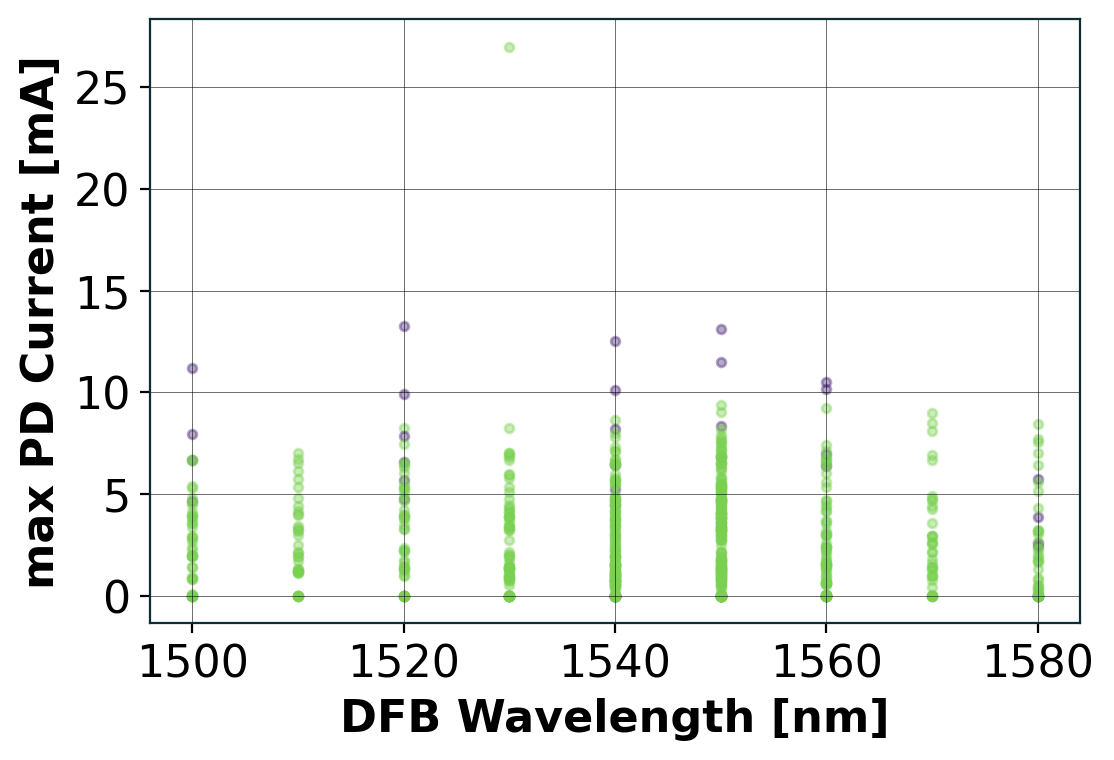

In [102]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200
fig, ax = plt.subplots()
ax.set_ylabel("max PD Current [mA]", fontweight = "bold")
ax.set_xlabel("DFB Wavelength [nm]", fontweight = "bold")
for m in meas_list:
    if int(m.meas_attrs["PulseCW"]) == 0:
        color = plt.cm.viridis(.8)
    else:
        color = plt.cm.viridis(.1)
    ax.scatter(m.device["WL_L"]*1e9, m.datasets[0][1].max()*1e3, color = color, s = 10, alpha = 0.4)


## From Measurement Type to Measurement
Measurements can be loaded en masse by calling get_all_measurements and specifiying the target type or leaving the default "all".

In [103]:
pdspec_list = measurements.get_all_measurements(connex, meas_type = "pd_spectrum")
print(len(measlist), "pd_spectrum measurements total")

Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes ve

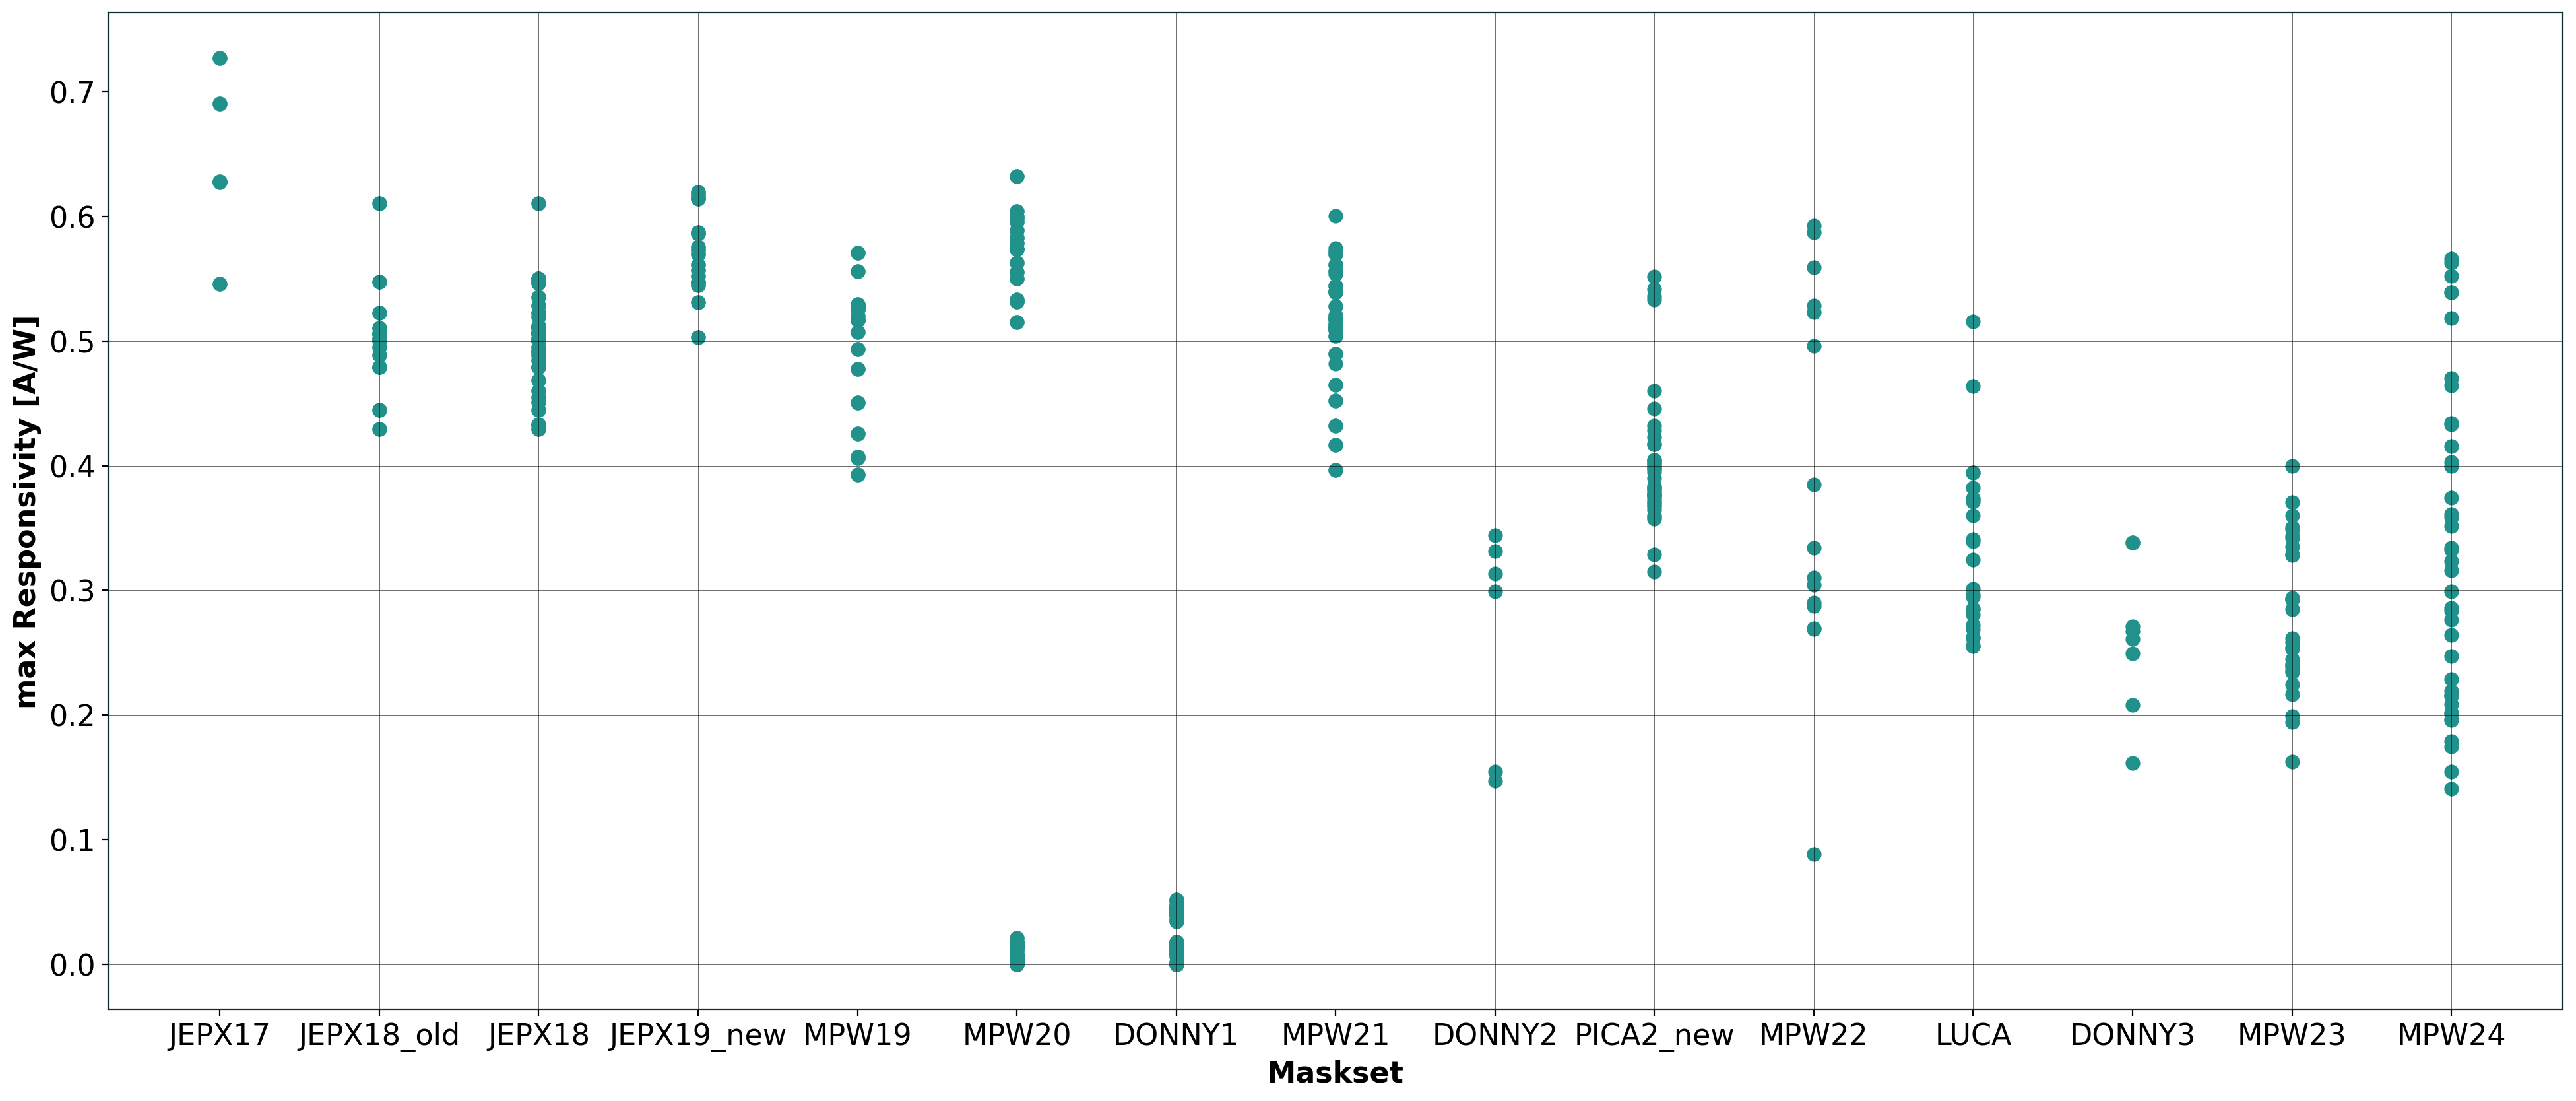

In [104]:
fig, ax = plt.subplots(figsize= (24,10))
ax.set_ylabel("max Responsivity [A/W]", fontweight = "bold")
ax.set_xlabel("Maskset", fontweight = "bold")
for m in pdspec_list:
    responsivity = -m.datasets[0][2]/m.datasets[0][1]
    ax.scatter(m.device["MasksetName"], responsivity.max(), color = plt.cm.viridis(0.5))


## Multidimensional Sweeps

In [105]:
er_meas = measurements.get_all_measurements(connex, meas_type = "MZM_ER")[5]
print(er_meas.meas_attrs)
len(er_meas.datasets)

Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
Polarization string reshaped to make stokes vectors.
{'IDMeasurement': 60678, 'WaferName': 'MPW19#3', 'MeasurementType': 'MZM_ER', 'Operator': 'heibach', 'Comments': '-1', 'Station': 'PIC_Lab1', 'Date': datetime.datetime(2021, 4, 8, 17, 18, 3), 'Parameters': array(['polarization', 'wavelength'], dtype='<U12'), 'chi': '-1', 'psi': '-1', 'wavelength': array([1480., 1500., 1520., 1540., 1560.]), 'temperature': '20', 

10

In [106]:
er_meas.unpack()
er_meas.unpacked_ds.shape

(2, 5, 3, 441)

# Creating Measurements
Creating new measurements involves adding measurement attributes a dataset and a device to an empty measurements.Measurement instance.

In [107]:
newmeas = measurements.Measurement(connex, "vi")
print(newmeas.meas_attrs)

{'IDMeasurement': -1, 'WaferName': -1, 'MeasurementType': 'vi', 'Operator': -1, 'Comments': -1, 'Station': -1, 'Date': -1, 'Parameters': -1, 'PulseCW': -1, 'Temp': -1, 'CalibrationWL': -1, 'Pulseperiod': -1, 'Pulsewidth': -1}


In [108]:
newmeas.device = device_list[0]
print(newmeas.device["MasksetName"])

MPW24


In [109]:
import numpy as np
newmeas.meas_attrs["Operator"] = "pytestuser"
newmeas.meas_attrs["Station"]  = "PIC_Lab1"
newmeas.meas_attrs["PulseCW"] = 0
newmeas.meas_attrs["Pulseperiod"] = 1
newmeas.meas_attrs["Pulsewidth"] = 1
newmeas.meas_attrs["WaferName"] = "MPW24#91"
newmeas.meas_attrs["Temp"] = 20
newmeas.meas_attrs["Comments"] = "dummy upload"
newmeas.datasets.append([np.linspace(0,1,100), np.linspace(0,10,100), ])
newmeas.write_sql_al(connex)
print("Measurement", newmeas.meas_attrs["IDMeasurement"], "successfully uploaded.")

Measurement 61313 successfully uploaded.


# Quick look at Evaluations

In [110]:
from foubase import evaluations
ev = evaluations.Evaluation(connex, "pd_spectrum")
print(ev.eval_attrs)

{'IDEvaluation': -1, 'EvaluationName': 'pd_spectrum', 'Date': -1, 'IDMeasurementMain': -1, 'IDUser': -1, 'Version': -1, 'Comments': -1, 'RunLog': -1, 'responsivity': -1, 'dark_current': -1, 'PeakWL': -1, 'PDL': -1}


In [111]:
ev.measurement = pdspec_list[0]
ev.compute()

In [112]:
print(ev.eval_attrs)

{'IDEvaluation': -1, 'EvaluationName': 'pd_spectrum', 'Date': datetime.datetime(2022, 6, 9, 13, 34, 48, 733701), 'IDMeasurementMain': -1, 'IDUser': -1, 'Version': -1, 'Comments': -1, 'RunLog': -1, 'responsivity': [0.727027669139954, 0.7728155434787926], 'dark_current': 1.49e-08, 'PeakWL': [1.53e-06, 1.51e-06], 'PDL': -1}


In [113]:
ev.write_sql_al(connex)

not writing another evaluation for measurement 42981
